# import packages and functions

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import xarray as xr
import h5py
import xmitgcm
import pandas as pd
# from scipy.io import loadmat
# import matplotlib as mpl
# import time
import gsw
from xmitgcm import llcreader
import cartopy.crs as ccrs
import cartopy.feature as cfeature


# import existing python files
plt.rcParams['figure.figsize'] = (10,4)

# add rdmds reading functions to path
sys.path.append("/home/mmurakami/MITgcm/MITgcm_c68r/MITgcm-checkpoint68r/utils/python/MITgcmutils/MITgcmutils/") # go to parent dir
from mds import *

# add the other files
sys.path.append("/home/mmurakami/crios_backups/an_helper_functions")
from read_binary import *
from aste_helper_funcs import *
from timing_functions import *           # ts2dte, get_fnames, etc.

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%run /home/mmurakami/crios_backups/ASTE_270/prep_grid.py

(50,) (50, 1350, 270)
hf1 (1350, 270)
(1, 1350, 270)
LwetC2d 146614
LwetC 4833023



# write our sample field - eg depth

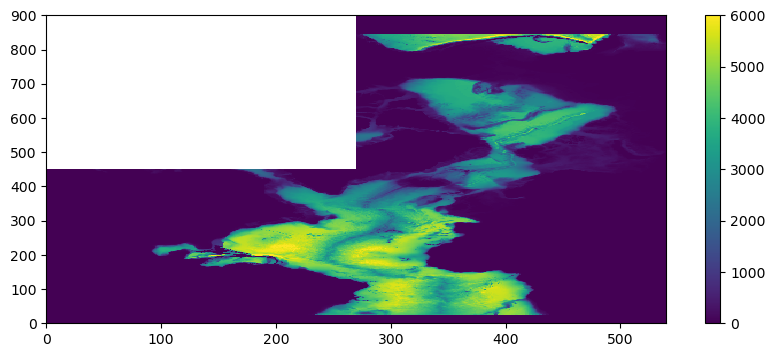

In [4]:
depth = mygrid['Depth']
plt.pcolormesh(get_aste_tracer(depth,nfx,nfy)[0])
plt.colorbar()
# plt.ylim(450,900)
# plt.xlim(200,540)

In [5]:
fldout_depth = get_aste_faces(depth,nfx,nfy)

Text(0.5, 1.0, '5')

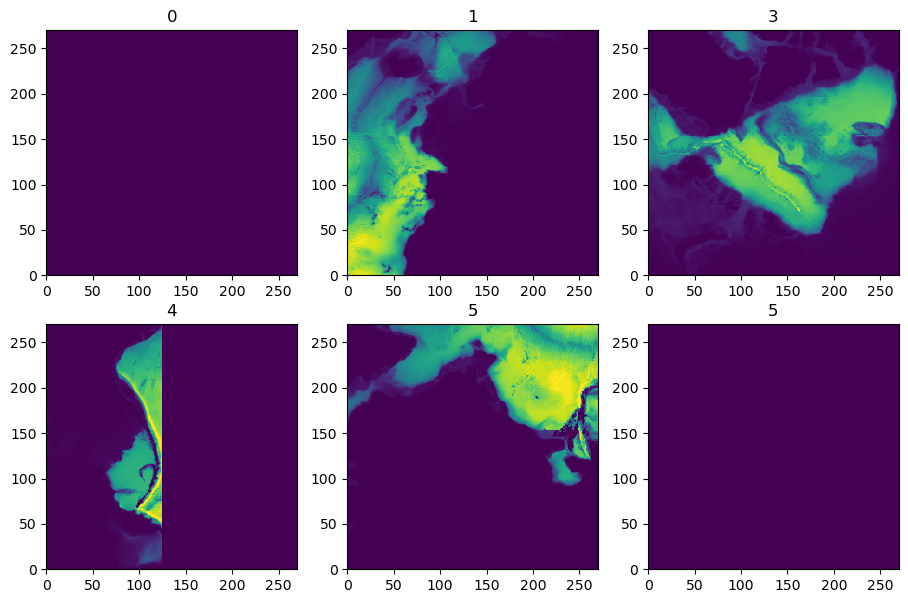

In [6]:
fig = plt.figure(figsize=(11,7))

ax = plt.subplot(231)
ax.pcolormesh(np.zeros((270,270)))
ax.set_title("0")

ax = plt.subplot(232)
ax.pcolormesh(fldout_depth.f1[0][-270:])
ax.set_title("1")

ax = plt.subplot(233)
ax.pcolormesh(fldout_depth.f3[0])
ax.set_title("3")

ax = plt.subplot(234)
tmp = fldout_depth.f4[0]
tmpf4 = np.zeros((270,270))
tmpf4[:,:180] = tmp
ax.pcolormesh(tmpf4)
ax.set_title("4")

ax = plt.subplot(235)
ax.pcolormesh(fldout_depth.f5[0][:,:270])
ax.set_title("5")

ax = plt.subplot(236)
ax.pcolormesh(np.zeros((270,270)))
ax.set_title("5")

# run the example

In [7]:
time = pd.date_range("2014-09-01", periods=1)
time

DatetimeIndex(['2014-09-01'], dtype='datetime64[ns]', freq='D')

In [8]:
# make some arrays based on the breakdown from above
# def prepfaces_xarr(fldout,time):
    # takes fldout from An's get_aste_faces
    # returns an array of shape time, depth, face, 270, 270 as an xarray

nz = fldout_depth.f3.shape[0]

# get the arrays as faces
f0 = np.zeros((fldout_depth.f3.shape[0],270,270))  # depth independent, will be of shape 1 if this is 2D
f1 = fldout_depth.f1[:,-270:,:]
f2 = fldout_depth.f3
f4 = fldout_depth.f5[:,:,:270]
f5 = np.zeros((fldout_depth.f3.shape[0],270,270))

# fill f4 becuse this is of width 180
tmp = fldout_depth.f4
f3 = np.zeros((nz,270,270))
f3[:,:,:180] = tmp

# reformulate as an xarray

# Define the dimensions and coordinates
time = pd.date_range("2014-09-01", periods=1)
nz = fldout_depth.f3.shape[0]
k = np.arange(nz)   # depth independent
tile = np.arange(6)
j = np.arange(270)
i_g = np.arange(270)

# Create the bigger array from the tiles
data = np.zeros((1,nz, 6, 270, 270))
data[:,:,0,:,:] = f0
data[:,:,1,:,:] = f1
data[:,:,2,:,:] = f2
data[:,:,3,:,:] = f3
data[:,:,4,:,:] = f4
data[:,:,5,:,:] = f5

# fill 0 with nan
data[data ==0] = np.nan

# Create the DataArray
xda = xr.DataArray(
    data=data,
    dims=["time","k", "tile", "j", "i_g"],
    coords={
        "time" : time,
        "k": k,
        "tile": tile,
        "j": j,
        "i_g": i_g
    },
    attrs={
        "standard_name": "depth",
        "long_name": "Ocean Depth",
        "units": "m"
    }
)

# # Display the DataArray
xda

<xarray.DataArray (time: 1, k: 1, tile: 6, j: 270, i_g: 270)>
array([[[[[          nan,           nan,           nan, ...,
                     nan,           nan,           nan],
          [          nan,           nan,           nan, ...,
                     nan,           nan,           nan],
          [          nan,           nan,           nan, ...,
                     nan,           nan,           nan],
          ...,
          [          nan,           nan,           nan, ...,
                     nan,           nan,           nan],
          [          nan,           nan,           nan, ...,
                     nan,           nan,           nan],
          [          nan,           nan,           nan, ...,
                     nan,           nan,           nan]],

         [[5134.39499407, 5161.93776335, 5113.83585131, ...,
                     nan,           nan,           nan],
          [5239.76372092, 5223.90573617, 5331.2       , ...,
                     nan,           nan,           nan],
          [5414.66016213, 5331.2       , 5384.71334985, ...,
                     nan,           nan,           nan],
...
          [          nan,           nan,           nan, ...,
           5131.65469261, 5398.90987196, 5011.03227648],
          [          nan,           nan,           nan, ...,
           5200.46773404, 5331.2       , 5139.37521555],
          [          nan,           nan,           nan, ...,
           5350.36183609, 5433.50607322, 5165.10470236]],

         [[          nan,           nan,           nan, ...,
                     nan,           nan,           nan],
          [          nan,           nan,           nan, ...,
                     nan,           nan,           nan],
          [          nan,           nan,           nan, ...,
                     nan,           nan,           nan],
          ...,
          [          nan,           nan,           nan, ...,
                     nan,           nan,           nan],
          [          nan,           nan,           nan, ...,
                     nan,           nan,           nan],
          [          nan,           nan,           nan, ...,
                     nan,           nan,           nan]]]]])
Coordinates:
  * time     (time) datetime64[ns] 2014-09-01
  * k        (k) int64 0
  * tile     (tile) int64 0 1 2 3 4 5
  * j        (j) int64 0 1 2 3 4 5 6 7 8 ... 261 262 263 264 265 266 267 268 269
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
Attributes:
    standard_name:  depth
    long_name:      Ocean Depth
    units:          m

In [9]:
# load a sample ASTE dataset -- maybe this will help us plot using the lat/long values
aste = llcreader.CRIOSPortalASTE270Model()
ds = aste.get_dataset()
ds = ds.sel(time='2014-09')

In [10]:
ds = ds.rename({'face':'tile'})
cds = ds.coords.to_dataset().reset_coords()
ds = ds.reset_coords(drop=True)

In [11]:
del aste, ds

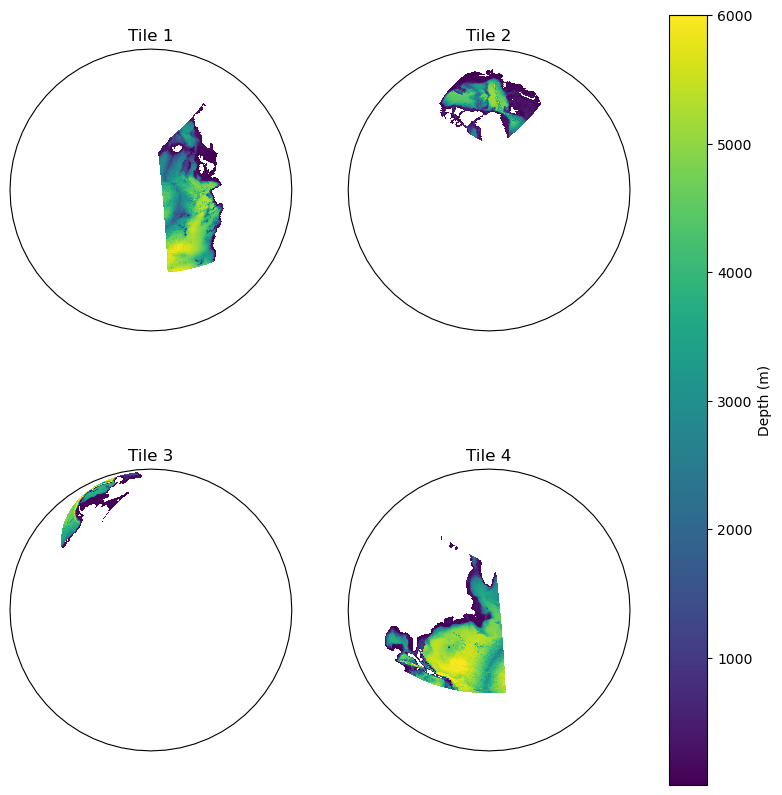

In [12]:
# do a sample
subplot_kw = {"projection": ccrs.Orthographic(central_longitude=-45, central_latitude=50)}
fig, axes = plt.subplots(nrows=2, ncols=2, subplot_kw=subplot_kw, figsize=(10, 10))

for i,ax in enumerate(axes.flat):
    
    
    
    idx = i+1
    
    lon = cds.data_vars['XC'][idx].values
    lat = cds.data_vars['YC'][idx].values
    data = xda[0, 0, idx].values  # Select first time step and 0 depth for the tile
    
    data[np.isnan(lon)] = np.nan
    data[np.isnan(lat)] = np.nan

    lon[np.isnan(lon)] = np.nanmin(lon)-1 # fill with near values so as not to make error
    lat[np.isnan(lat)] = np.nanmin(lat)-1 # fill with near values so as not to make error

    if idx == 4:
        data[(data < 30) & (lon < -97)] = np.nan
    
    C = ax.pcolormesh(
            lon,
            lat,
            data,  # first time step, 0 depth, tile
            transform=ccrs.PlateCarree(),  # Project using PlateCarree for longitude/latitude
        )

    ax.set_global()
    ax.set_title("Tile " + str(idx))

# ax.coastlines()

fig.colorbar(C, ax=axes.ravel().tolist(), orientation='vertical',label="Depth (m)")

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

In [ ]:
# do a sample
# subplot_kw = {"projection": ccrs.Orthographic(central_longitude=-45, central_latitude=50)}
subplot_kw = {"projection": ccrs.PlateCarree()}  # Simplified projection for testing

fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw=subplot_kw, figsize=(8, 8))

for i in range(4):
    idx = i+1
    
    lon = cds.data_vars['XC'][idx].values
    lat = cds.data_vars['YC'][idx].values
    data = xda[0, 0, idx].values  # Select first time step and 0 depth for the tile
    
    
    lon[np.isnan(lon)] = np.nanmin(lon)-1 # fill with near values so as not to make error
    lat[np.isnan(lat)] = np.nanmin(lat)-1 # fill with near values so as not to make error
    data[np.isnan(lon)] = np.nan
    data[np.isnan(lat)] = np.nan    #print(latfill)
    
    C = ax.pcolormesh(
            lon,
            lat,
            data,  # first time step, 0 depth, tile
            transform=ccrs.PlateCarree(),  # Project using PlateCarree for longitude/latitude
            cmap='viridis',
        )
    
    ax.set_global()
    ax.set_title("ASTE Depth")

# print(1)

# ax.coastlines()
# ax.add_feature(cfeature.LAND, zorder=2, facecolor="0.75")  # Optional: Add land with specific color
ax.add_feature(cfeature.LAND, zorder=2, facecolor="0.75")  # Add land with a light grey color

# print(2)

fig.colorbar(C, ax=ax, orientation='vertical', label="Depth (m)")
# print(3)

plt.savefig('output_plot2.png', dpi=300)  # Save the plot as a PNG file